In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import plotly.io as pio


p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## Scatterplot for # libraries vs. # tissues

In [32]:
df = pd.read_csv('ali_sample_table.csv')
c_dict, order = get_tissue_cell_line_colors()
style_dict = {'Human': 'o', 'Mouse': 'D'}

In [33]:
# gb species and classification and count tissue / cell type
temp2 = df.groupby(['classification', 'species']).nunique().reset_index()
temp2 = temp2[['classification', 'species', 'tissue / cell type']]
temp2.rename({'tissue / cell type': 'n_tissue_cell_type'}, axis=1, inplace=True)

In [34]:
# gb species and classification and count libraries
temp = df.groupby(['classification', 'species']).count().reset_index()
temp = temp[['classification', 'species', 'dataset']]
temp.rename({'dataset': 'n_libraries'}, axis=1, inplace=True)

In [35]:
temp = temp.merge(temp2, on=['classification', 'species'])

In [36]:
temp

,classification,species,n_libraries,n_tissue_cell_type
0,cell_line,Human,87,30
1,cell_line,Mouse,9,2
2,tissue,Human,51,11
3,tissue,Mouse,117,6


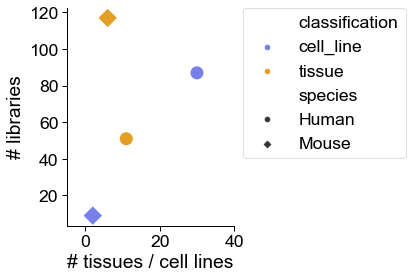

In [44]:
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,4))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.scatterplot(data=temp, x='n_tissue_cell_type', y='n_libraries',
            hue='classification', style='species', markers=style_dict,
            palette=c_dict, alpha=1, s=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = '# tissues / cell lines'
ylabel = '# libraries'
xlim = (-5, 40)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel, xlim=xlim)

fname = 'figures/data_summary_libraries_v_tissue_cell_line.pdf'
plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

## Box plot for number of samples / libraries for human / mouse there are

In [2]:
human = pd.read_csv('swan/swan_metadata.tsv', sep='\t')
human['species'] = 'Human'

mouse = pd.read_csv('../mouse/lr_bulk/swan/mouse_metadata.tsv', sep='\t')
mouse['species'] = 'Mouse'

keep_cols = ['dataset', 'sample', 'classification', 'species']
human = human[keep_cols]
mouse = mouse[keep_cols]

df = pd.concat([human, mouse], axis=0)

In [3]:
df.to_csv('table.tsv', sep='\t')

In [4]:
# gb species and classification and count libraries
temp = df.groupby(['classification', 'species']).count().reset_index()
temp = temp[['classification', 'species', 'dataset']]
temp.rename({'dataset': 'n_libraries'}, axis=1, inplace=True)

In [5]:
# gb species and classification and count samples
temp2 = df.groupby(['classification', 'species']).nunique().reset_index()
temp2 = temp2[['classification', 'species', 'sample']]
temp2.rename({'sample': 'n_samples'}, axis=1, inplace=True)

In [6]:
temp = temp.merge(temp2, on=['species', 'classification'])

In [7]:
c_dict, order = get_tissue_cell_line_colors()

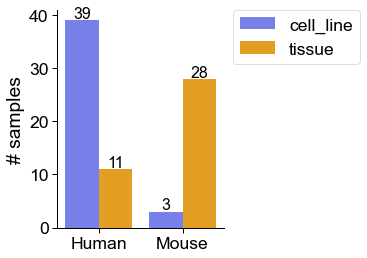

In [8]:
# n samples
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,4))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.barplot(data=temp2, x='species', y='n_samples',
            hue='classification',
            palette=c_dict, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = ''
ylabel = '# samples'

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
# ax.set_xticklabels(['vM25', 'Obs.', 'Obs. major'])

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        label = '{:.0f}'.format(p.get_height())
        # n = p.get_height()
        # label = '{:.0f} samples'.format(temp.loc[temp.n_libraries == n, 'n_samples'].tolist()[0])
        x = p.get_x() + p.get_width() / 2
        # x = p.get_x() + p.get_width() / 2 - 0.3
        # x = p.get_x() + p.get_width() / 2 - (0.015)*n_cats
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(label, (x, y), size=16, horizontalalignment='center')


add_perc_2(ax)

fname = 'figures/data_summary_samples.pdf'
plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

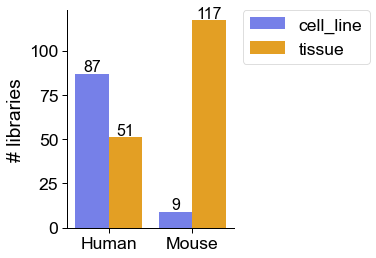

In [9]:
# n libraries
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,4))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.barplot(data=temp, x='species', y='n_libraries',
            hue='classification',
            palette=c_dict, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = ''
ylabel = '# libraries'

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
# ax.set_xticklabels(['vM25', 'Obs.', 'Obs. major'])

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        label = '{:.0f}'.format(p.get_height())
        # n = p.get_height()
        # label = '{:.0f} samples'.format(temp.loc[temp.n_libraries == n, 'n_samples'].tolist()[0])
        x = p.get_x() + p.get_width() / 2
        # x = p.get_x() + p.get_width() / 2 - 0.3
        # x = p.get_x() + p.get_width() / 2 - (0.015)*n_cats
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(label, (x, y), size=16, horizontalalignment='center')


add_perc_2(ax)
fname = 'figures/data_summary_libraries.pdf'
plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

In [11]:
## Ali's categorizations - unique tissues / cell types

In [12]:
df = pd.read_csv('ali_sample_table.csv')

In [14]:
# gb species and classification and count tissue / cell type
temp2 = df.groupby(['classification', 'species']).nunique().reset_index()
temp2 = temp2[['classification', 'species', 'tissue / cell type']]
temp2.rename({'tissue / cell type': 'n_tissue_cell_type'}, axis=1, inplace=True)

In [16]:
temp2

,classification,species,n_tissue_cell_type
0,cell_line,Human,30
1,cell_line,Mouse,2
2,tissue,Human,11
3,tissue,Mouse,6


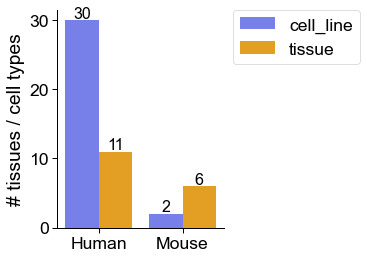

In [18]:
# n libraries
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,4))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.barplot(data=temp2, x='species', y='n_tissue_cell_type',
            hue='classification',
            palette=c_dict, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = ''
ylabel = '# tissues / cell types'

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
# ax.set_xticklabels(['vM25', 'Obs.', 'Obs. major'])

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        label = '{:.0f}'.format(p.get_height())
        # n = p.get_height()
        # label = '{:.0f} samples'.format(temp.loc[temp.n_libraries == n, 'n_samples'].tolist()[0])
        x = p.get_x() + p.get_width() / 2
        # x = p.get_x() + p.get_width() / 2 - 0.3
        # x = p.get_x() + p.get_width() / 2 - (0.015)*n_cats
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(label, (x, y), size=16, horizontalalignment='center')


add_perc_2(ax)
fname = 'figures/data_summary_tissue_celltype.pdf'
plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

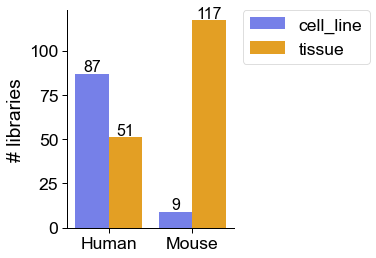

In [10]:
# n libraries
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(3,4))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = sns.barplot(data=temp, x='species', y='n_libraries',
            hue='classification',
            palette=c_dict, saturation=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = ''
ylabel = '# libraries'

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = ax.set(xlabel=xlabel, ylabel=ylabel)
# ax.set_xticklabels(['vM25', 'Obs.', 'Obs. major'])

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        label = '{:.0f}'.format(p.get_height())
        # n = p.get_height()
        # label = '{:.0f} samples'.format(temp.loc[temp.n_libraries == n, 'n_samples'].tolist()[0])
        x = p.get_x() + p.get_width() / 2
        # x = p.get_x() + p.get_width() / 2 - 0.3
        # x = p.get_x() + p.get_width() / 2 - (0.015)*n_cats
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(label, (x, y), size=16, horizontalalignment='center')


add_perc_2(ax)
fname = 'figures/data_summary_libraries.pdf'
plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")